In [15]:
import glob
import numpy as np
import pandas as pd
import pyarrow as pa
import seaborn as sns
import sys

from pathlib import Path

# Project code:
import pathhelper

In [2]:
out_dir = pathhelper.git_root(".") / "output"
data_dir = pathhelper.data_dir(".")
weather_filename = data_dir / "weather/en_climate_hourly_ON_6144239_concat.feather"

# Load data

In [6]:
df = pd.read_feather(weather_filename)

df.columns = df.columns.str.lower()
df["hour"] = df["time (lst)"].str[0:2].astype(int)
df["weather_cat"] = df["weather"].astype("category").cat.codes
weather_full_df = df

In [13]:
df.dtypes

longitude (x)          float64
latitude (y)           float64
station name            object
climate id               int64
date/time (lst)         object
year                     int64
month                    int64
day                      int64
time (lst)              object
temp (°c)              float64
temp flag               object
dew point temp (°c)    float64
dew point temp flag     object
rel hum (%)            float64
rel hum flag            object
precip. amount (mm)    float64
precip. amount flag     object
wind dir (10s deg)     float64
wind dir flag           object
wind spd (km/h)        float64
wind spd flag           object
visibility (km)        float64
visibility flag         object
stn press (kpa)        float64
stn press flag          object
hmdx                   float64
hmdx flag              float64
wind chill             float64
wind chill flag        float64
weather                 object
hour                     int64
weather_cat               int8
dtype: o

In [7]:
df.describe()

longitude (x)  latitude (y)  climate id           year          month  \
count   1.314960e+05  1.314960e+05    131496.0  131496.000000  131496.000000   
mean   -8.038000e+01  4.346000e+01   6144239.0    2017.000730       6.522723   
std     9.194458e-11  3.299773e-11         0.0       4.320707       3.448773   
min    -8.038000e+01  4.346000e+01   6144239.0    2010.000000       1.000000   
25%    -8.038000e+01  4.346000e+01   6144239.0    2013.000000       4.000000   
50%    -8.038000e+01  4.346000e+01   6144239.0    2017.000000       7.000000   
75%    -8.038000e+01  4.346000e+01   6144239.0    2021.000000      10.000000   
max    -8.038000e+01  4.346000e+01   6144239.0    2024.000000      12.000000   

                 day      temp (°c)  dew point temp (°c)    rel hum (%)  \
count  131496.000000  126913.000000        126832.000000  120489.000000   
mean       15.730243       8.211114             3.874381      76.689582   
std         8.800381      11.004774            10.127915      17.692844   
min         1.000000     -32.700000           -35.900000      14.000000   
25%         8.000000      -0.200000            -3.600000      65.000000   
50%        16.000000       8.300000             4.100000      80.000000   
75%        23.000000      17.100000            12.400000      91.000000   
max        31.000000      35.000000            25.200000     100.000000   

       precip. amount (mm)  wind dir (10s deg)  wind spd (km/h)  \
count         90799.000000       115502.000000    126890.000000   
mean              0.162070           21.329475        14.664552   
std               6.685869            9.476319         9.197943   
min               0.000000            1.000000         0.000000   
25%               0.000000           13.000000         8.000000   
50%               0.000000           23.000000        13.000000   
75%               0.000000           30.000000        21.000000   
max             610.400000           36.000000        68.000000   

       visibility (km)  stn press (kpa)          hmdx  hmdx flag  \
count    126468.000000    126902.000000  18026.000000        0.0   
mean         14.002833        97.766127     29.790858        NaN   
std           4.414896         0.723278      3.569228        NaN   
min           0.000000        94.020000     25.000000        NaN   
25%          16.100000        97.330000     27.000000        NaN   
50%          16.100000        97.790000     29.000000        NaN   
75%          16.100000        98.240000     32.000000        NaN   
max          16.100000       100.430000     47.000000        NaN   

         wind chill  wind chill flag           hour    weather_cat  
count  31409.000000              0.0  131496.000000  131496.000000  
mean     -11.185838              NaN      11.500000       2.530457  
std        6.073759              NaN       6.922213       9.021794  
min      -41.000000              NaN       0.000000      -1.000000  
25%      -15.000000              NaN       5.750000      -1.000000  
50%      -10.000000              NaN      11.500000      -1.000000  
75%       -7.000000              NaN      17.250000      -1.000000  
max       -1.000000              NaN      23.000000      40.000000

In [12]:
df.isnull().sum() / len(df)

longitude (x)          0.000000
latitude (y)           0.000000
station name           0.000000
climate id             0.000000
date/time (lst)        0.000000
year                   0.000000
month                  0.000000
day                    0.000000
time (lst)             0.000000
temp (°c)              0.034853
temp flag              0.999262
dew point temp (°c)    0.035469
dew point temp flag    0.998639
rel hum (%)            0.083706
rel hum flag           0.998730
precip. amount (mm)    0.309492
precip. amount flag    0.999673
wind dir (10s deg)     0.121631
wind dir flag          0.963352
wind spd (km/h)        0.035028
wind spd flag          0.999080
visibility (km)        0.038237
visibility flag        0.995871
stn press (kpa)        0.034936
stn press flag         0.999171
hmdx                   0.862916
hmdx flag              1.000000
wind chill             0.761141
wind chill flag        1.000000
weather                0.806823
hour                   0.000000
weather_

In [17]:
df.drop([
    "longitude (x)", "latitude (y)", "station name", "climate id", "hmdx flag", "wind chill flag",
    "temp flag", "dew point temp flag", "rel hum flag", "precip. amount flag", "wind spd flag", "visibility flag", "stn press flag",
], axis=1, inplace=True)

df = df.sample(n=1000)

In [36]:
#df.drop([
#   
#], axis=1, inplace=True)

CPU times: user 59.2 s, sys: 262 ms, total: 59.5 s
Wall time: 58.8 s


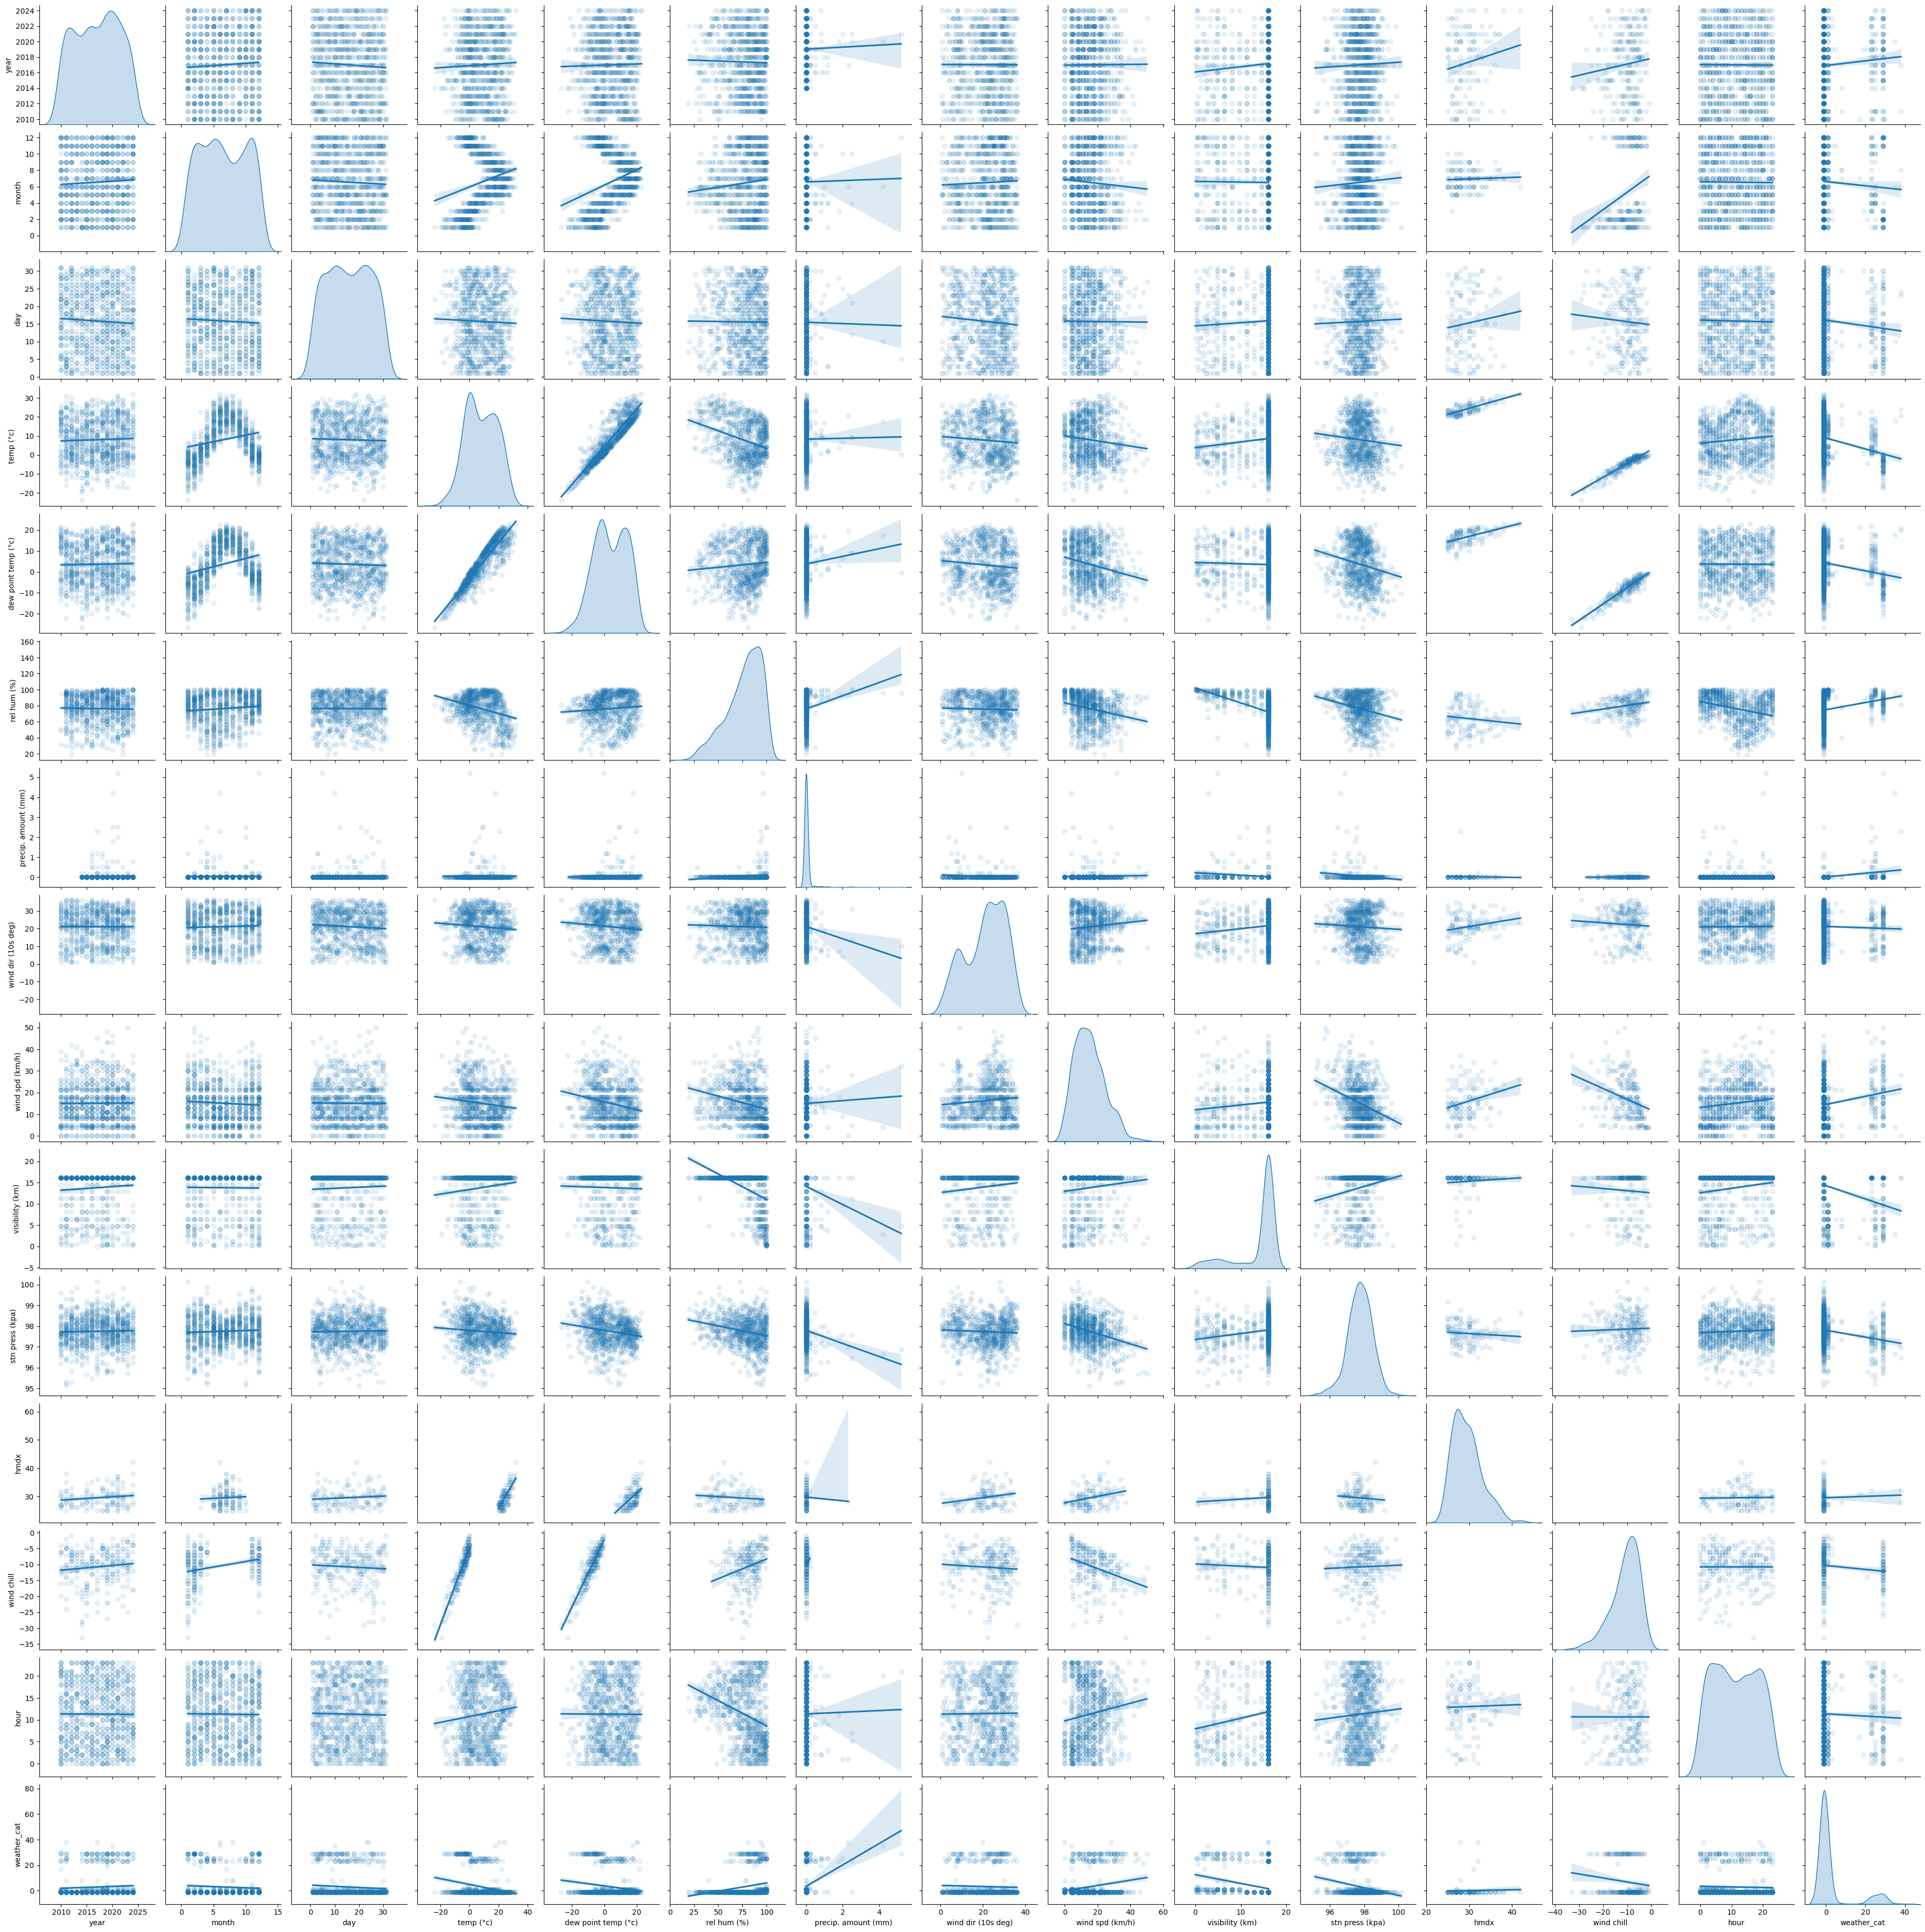

In [37]:
%%time
weather_pairplot = sns.pairplot(
    df,
    kind="reg",
    diag_kind="kde",
    plot_kws={"scatter_kws": {"alpha": 0.1}},
)

In [38]:
fig = weather_pairplot.fig
fig.savefig(out_dir / "weather_pairplot.png") 